100%|██████████| 9912422/9912422 [00:00<00:00, 106408214.71it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 21315448.50it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 27950336.03it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3223985.24it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/30], Train Loss: 0.3603, Train Accuracy: 89.12%, Test Loss: 0.1901, Test Accuracy: 94.30%
Epoch [2/30], Train Loss: 0.1495, Train Accuracy: 95.49%, Test Loss: 0.1253, Test Accuracy: 96.15%
Epoch [3/30], Train Loss: 0.1073, Train Accuracy: 96.77%, Test Loss: 0.1045, Test Accuracy: 96.79%
Epoch [4/30], Train Loss: 0.0868, Train Accuracy: 97.33%, Test Loss: 0.0863, Test Accuracy: 97.31%
Epoch [5/30], Train Loss: 0.0731, Train Accuracy: 97.73%, Test Loss: 0.0763, Test Accuracy: 97.66%
Epoch [6/30], Train Loss: 0.0641, Train Accuracy: 98.08%, Test Loss: 0.0849, Test Accuracy: 97.30%
Epoch [7/30], Train Loss: 0.0533, Train Accuracy: 98.33%, Test Loss: 0.0835, Test Accuracy: 97.24%
Epoch [8/30], Train Loss: 0.0496, Train Accuracy: 98.42%, Test Loss: 0.0793, Test Accuracy: 97.44%
Epoch [9/30], Train Loss: 0.0422, Train Accuracy: 98.69%, Test Loss: 0.0726, Test Accuracy: 97.68%
Epoch [10/30], Train Loss: 0.0376,

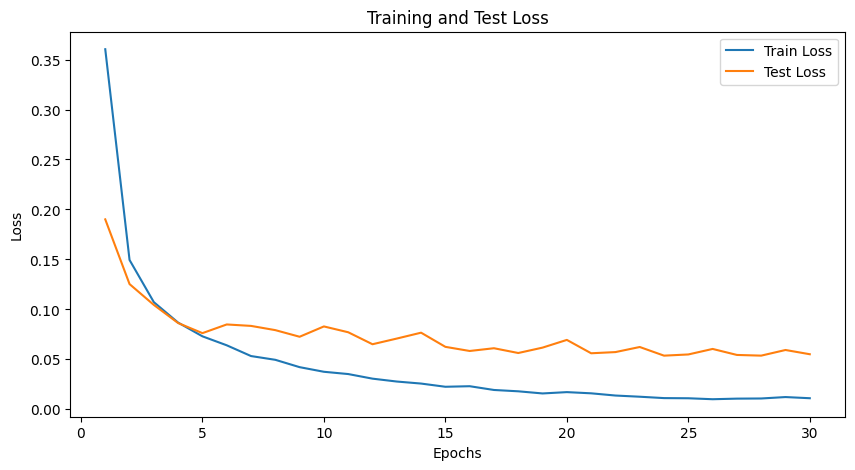

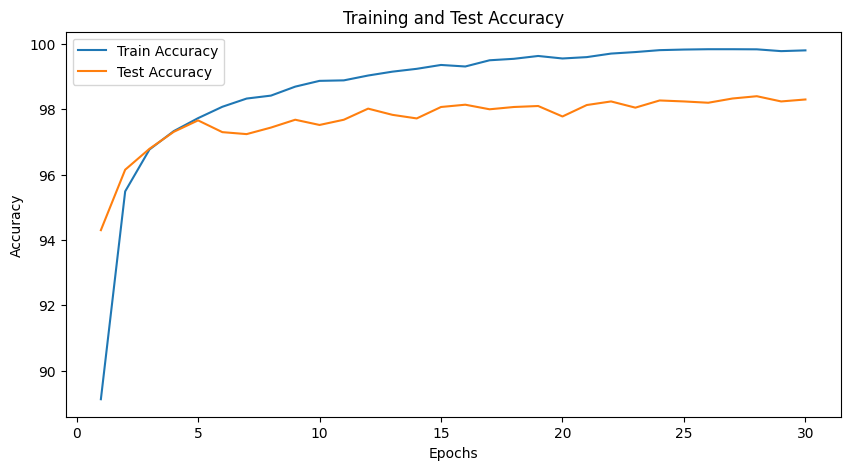

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset and normalize the pixel values
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=200, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=200, shuffle=False)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 500)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = MLP()

learning_rate = 0.1
momentum = 0.9
weight_decay = 0.0001

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)  # fine-tuning

# Training the model
num_epochs = 30
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    correct_train = 0
    total_train = 0
    running_train_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    train_loss = running_train_loss / len(train_loader)
    train_losses.append(train_loss)

    # Evaluate on test set
    model.eval()
    correct_test = 0
    total_test = 0
    running_test_loss = 0.0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = 100 * correct_test / total_test
    test_accuracies.append(test_accuracy)
    test_loss = running_test_loss / len(test_loader)
    test_losses.append(test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
          f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

# Plotting the training and test loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Plotting the training and test accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

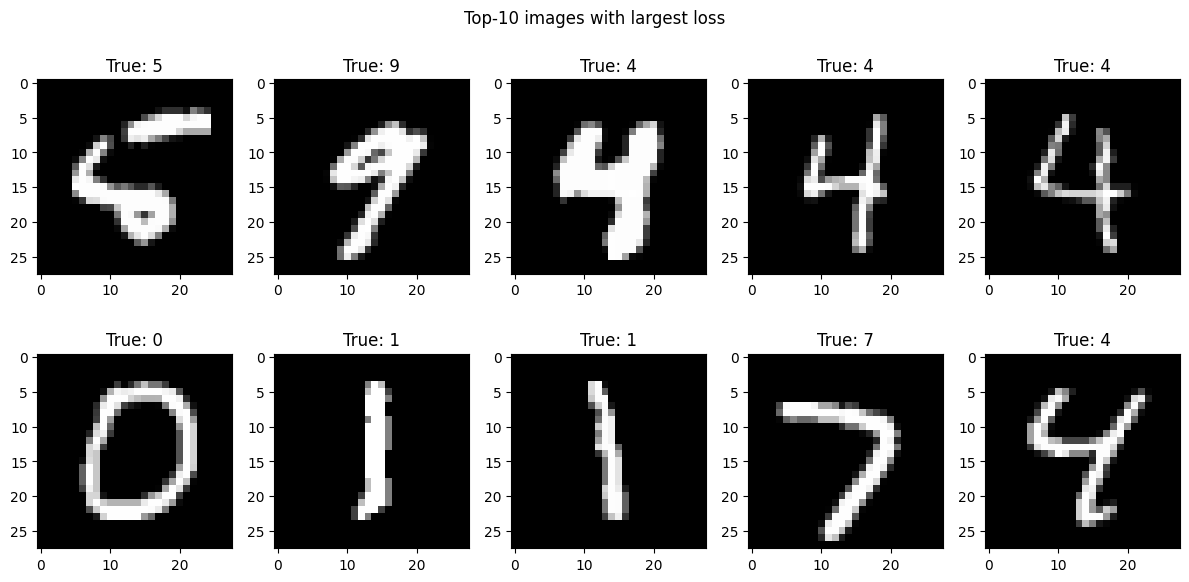

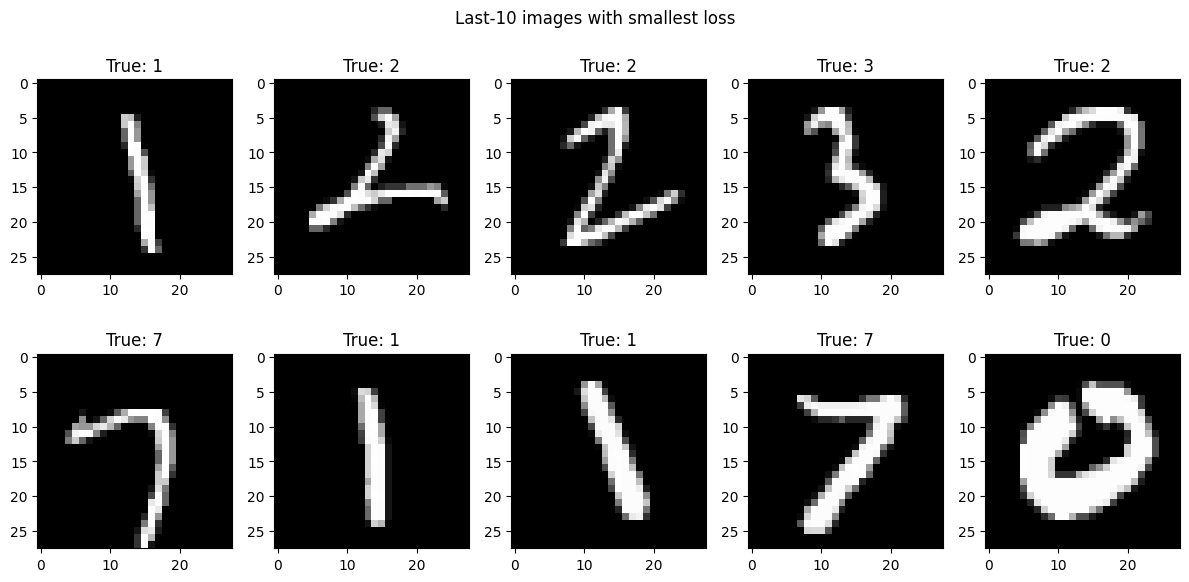

In [2]:
# Finding top-10 and last-10 images with highest and lowest loss
model.eval()
losses = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        losses.append(loss.item())

indices = np.argsort(losses)


# Top-10 test images with largest loss
top_10_indices = indices[-10:]
top_10_images = test_dataset.data[top_10_indices]
top_10_labels = test_dataset.targets[top_10_indices]

# Last-10 test images with smallest loss
last_10_indices = indices[:10]
last_10_images = test_dataset.data[last_10_indices]
last_10_labels = test_dataset.targets[last_10_indices]

# Plotting top-10 images with largest loss
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Top-10 images with largest loss')

for i, ax in enumerate(axes.flat):
    ax.imshow(top_10_images[i], cmap='gray')
    ax.set_title(f'True: {top_10_labels[i]}')

plt.tight_layout()
plt.show()

# Plotting last-10 images with smallest loss
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Last-10 images with smallest loss')

for i, ax in enumerate(axes.flat):
    ax.imshow(last_10_images[i], cmap='gray')
    ax.set_title(f'True: {last_10_labels[i]}')

plt.tight_layout()
plt.show()